In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [2]:

fle = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/2016_10_19__11_23_51_424_220_450_test.txt"

exx = np.transpose(pd.read_csv(fle, sep = " ", header = None))

In [3]:
exx.head()

,0,1
0,0.000000,-0.014654
1,0.000005,-0.015952
2,0.000010,-0.015628
3,0.000015,-0.014654
4,0.000020,-0.015303


In [4]:
len(exx)

20000

In [188]:
# convert data to m/s/s
data = np.array(exx.loc[:,1])*1000 / 10.17

log_rate = 200000.0

n =len(data) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(data)/n # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

In [189]:
# plot envelope
from scipy import signal
xs = np.array(range(len(exx)))/ float(log_rate)
data = data
peakind = signal.find_peaks_cwt(data, widths = [70])
#peakind, xs[peakind], data[peakind]


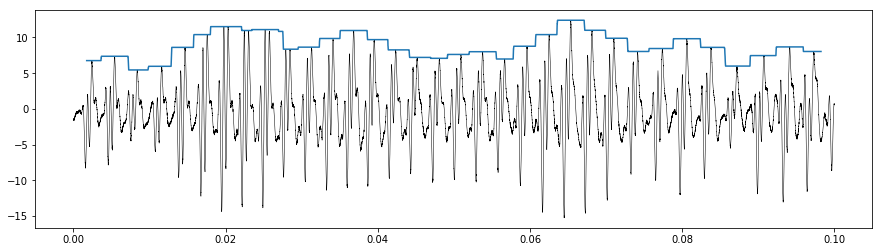

In [190]:

f, ax1 = plt.subplots()
f.set_figwidth(15)
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(data).rolling(700, center = True).max().tolist()
ax1.plot(np.linspace(0, np.max(np.array(range(len(exx)))/ float(log_rate)), num = len(mxs)), mxs)

In [191]:
from statsmodels.nonparametric.smoothers_lowess import lowess

mxs = pd.Series(data).rolling(700, center = True).max().tolist()
xs =  np.linspace(0, np.max(np.array(range(len(exx)))/ float(log_rate)), num = len(mxs))

mms = pd.Series(data).rolling(700, center = True).min().tolist()
xsm =  np.linspace(0, np.max(np.array(range(len(exx)))/ float(log_rate)), num = len(mms))

smth = lowess(endog = mxs, exog = xs, frac = 0.06, )
smth2 = lowess(endog = mms, exog = xsm, frac = 0.06)

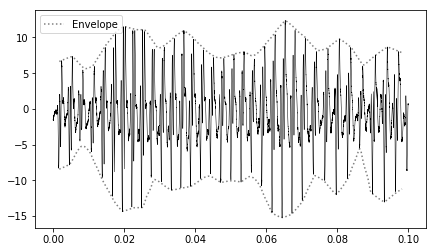

In [192]:
f, ax1 = plt.subplots()
f.set_figwidth(7)
ax1.plot(smth[:,0], smth[:, 1], linestyle= ':', color = 'grey', label = "Envelope")
ax1.plot(smth2[:,0], smth2[:, 1], linestyle= ':', color = 'grey')
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(data).rolling(700, center = True).max().tolist()
#ax1.plot(xs, mxs, linestyle= ':', color = 'grey')
#ax1.plot(xsm, mms, linestyle= ':', color = 'grey')
plt.legend(loc="upper left")


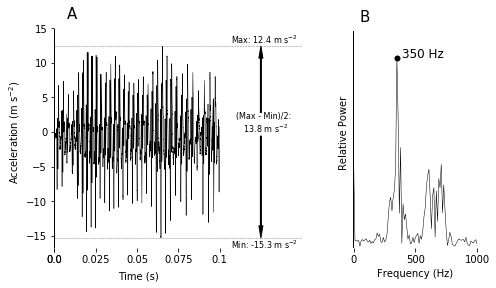

In [231]:
plt.figure(figsize=(7,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

# create subplot 1
ax1 = plt.subplot(gs[0])
#ax1.plot(smth[:,0], smth[:, 1], linestyle= ':', color = 'grey', label = "Envelope")
#ax1.plot(smth2[:,0], smth2[:, 1], linestyle= ':', color = 'grey')
#plt.legend(loc="upper center")
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
#ax1.set_ylabel("Acceleration (m s$^{-2})$")
ax1.set_ylabel("Acceleration (m s$^{-2})$")
ax1.set_xlabel("Time (s)")
ax1.set_frame_on(False)
ax1.axhline(y=np.max(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.axhline(y=np.min(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.set_xlim(-0.0002, 0.15)
ax1.set_ylim(-0.17*1000 / 10.19, 0.17*1000 / 10.19)

ax1.annotate(' ', xy=(0.125, np.min(data)), xytext=(0.125, -0.00),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )
ax1.annotate(' ', xy=(0.125, np.max(data)), xytext=(0.125, 0.014*1000 / 10.19),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )

ax1.annotate('(Max - Min)/2:\n   13.8 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.110, 0), 
             size=8
            )

ax1.annotate('Max: 12.4 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.107, np.max(data) + 0.1*np.std(data)), 
             size=8
            )
""
ax1.annotate('Min: -15.3 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.107, np.min(data) - 0.35*np.std(data)), 
             size=8
            )

ax1.plot([0,0.1], [ax1.get_ylim()[0], ax1.get_ylim()[0]], 'black', linewidth = 1)
ax1.plot([ax1.get_xlim()[0],ax1.get_xlim()[0]], [ax1.get_ylim()[0], 0.152*1000 / 10.19], 'black', linewidth = 1)
# add "L" shaped borders
#ax1.axvline(x = ax1.get_xlim()[0], linewidth = 1, color = 'black')
#ax1.axhline(y = ax1.get_ylim()[0], linewidth = 1, color = 'black')
ax1.axes.xaxis.set_ticklabels([0.000, 0.000,  0.025, 0.05, 0.075, 0.100])
ax1.axes.xaxis.set_ticks([0.000, 0.000,  0.025, 0.05, 0.075, 0.100])
ax1.xaxis.set_label_coords(0.342, -0.1)


def get_axis_limits(ax, scale=.98):
    return ax.get_xlim()[0] + np.diff(ax.get_xlim())*0.05, ax.get_ylim()[1]*scale     

# create subplot 2
ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)
ax2.annotate('350 Hz', xy=(domPK, beeFrqPwr), xytext=(domPK + 40, beeFrqPwr- 0.0001), size = 12
            )
ax2.set_xlim(-3, 1003)
ax2.set_ylabel('Relative Power')
ax2.set_xlabel('Frequency (Hz)')
plt.tight_layout()
ax2.set_frame_on(False)
ax2.axes.yaxis.set_ticklabels([])
ax2.axes.yaxis.set_ticks([])
ax2.set_ylim(0, 0.013*1000 / 10.19)

# add "L" shaped borders
#ax2.axvline(x = ax2.get_xlim()[0], linewidth = 1, color = 'black')
ax2.plot([ax2.get_xlim()[0],ax2.get_xlim()[0]], [ax2.get_ylim()[0], 0.0122*1000 / 10.19], 'black', linewidth = 1)
#ax2.axhline(y = ax2.get_ylim()[0], linewidth = 1, color = 'black')
ax2.plot([0,1500], [ax2.get_ylim()[0], ax2.get_ylim()[0]], 'black', linewidth = 1)


plt.savefig("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_noAnnot_amp3.pdf", width = 7, height = 1.5)
ax1.annotate('A', xy=get_axis_limits(ax1), size = 15)
ax2.annotate('B', xy=get_axis_limits(ax2), size = 15)

plt.savefig("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_amp3.pdf", width = 7, height = 1.5)
plt.show()

In [232]:
print(np.max(data), np.min(data))
print((np.max(data) - np.min(data)) / 2)

12.4067773504 -15.2567129408
13.8317451456


200050.007501


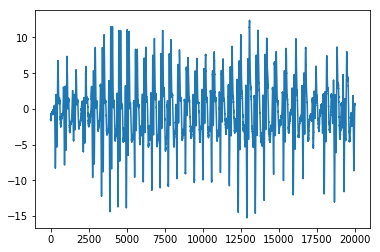

In [280]:
xx = np.array(range(len(exx)))/ float(log_rate)
#yy = np.sin(2*np.pi*xx * 350) * 10 + np.random.normal(size=len(xx), scale = 0.5)
yy = data

log_rate = 1/(np.max(xx) / len(xx))
print(log_rate)

plt.plot(yy)

In [281]:
from sklearn.kernel_ridge import KernelRidge

In [294]:
kr = KernelRidge(kernel = "laplacian", alpha = 5)
subsamp = np.linspace(0, len(xx)-1, 5000).astype(int)
x_sub = xx[subsamp].reshape(-1,1)
y_sub = yy[subsamp]

kr.fit(x_sub, y_sub)
preds = kr.predict(xx.reshape(-1,1))

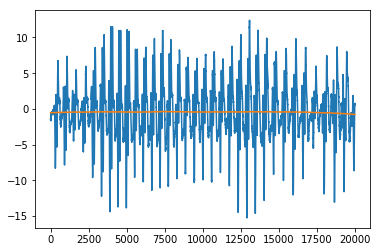

In [295]:
plt.plot(yy)
plt.plot(preds)

Text(0.5,1,'Acceleration (m/s/s) mean subtracted')

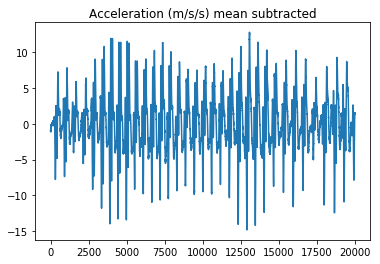

In [296]:
ff = yy - preds
plt.plot(ff)
plt.title("Acceleration (m/s/s) mean subtracted")

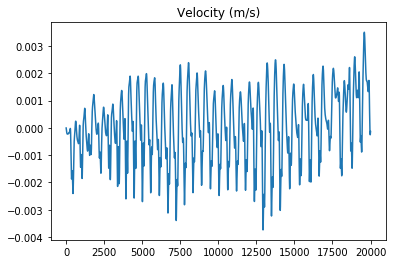

In [297]:
vv = (np.cumsum(ff) ) / log_rate
plt.plot(vv)
plt.title("Velocity (m/s)")
plt.show()


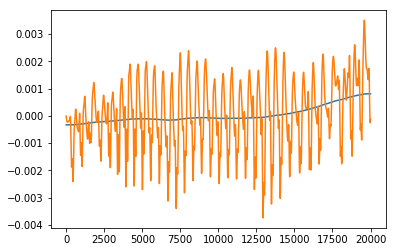

Text(0.5,1,'Position(m)')

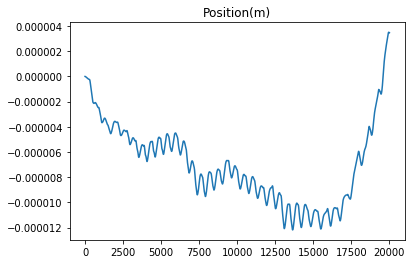

In [298]:
kr = KernelRidge(kernel = "laplacian", alpha = 10, degree = 10)
kr.fit(x_sub, vv[subsamp])
preds = kr.predict(xx.reshape(-1,1))
plt.plot(preds)
plt.plot(vv)
plt.show()

pp = (np.cumsum(vv) ) / log_rate
plt.plot(pp)
plt.title("Position(m)")


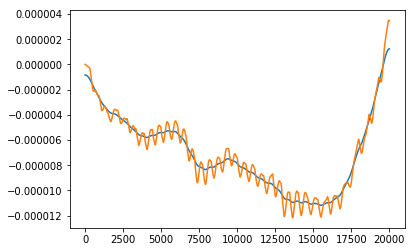

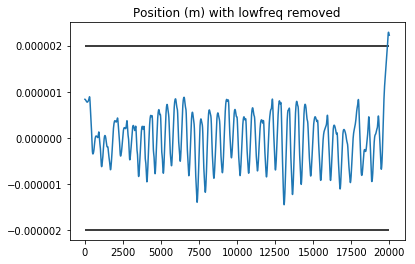

In [325]:
kr = KernelRidge(kernel = "laplacian", alpha = 0.3, degree = 20)
kr.fit(x_sub, pp[subsamp])
preds = kr.predict(xx.reshape(-1,1))
plt.plot(preds)
plt.plot(pp)
plt.show()

pp2 = pp - preds
plt.plot(pp2-np.mean(pp2))
plt.title("Position (m) with lowfreq removed")
plt.hlines(y = [0.000002, -0.000002], xmin =0, xmax = 20000)
plt.show()

8.78776127776e-07 -1.45303942163e-06


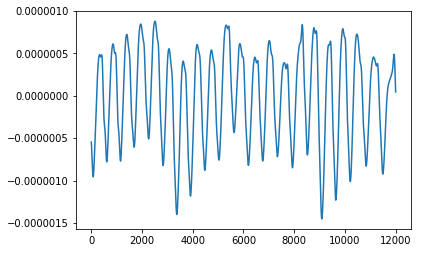

In [330]:
midDta = np.arange(int(0.2*len(xx)), int(0.8*len(xx)),step = 1 )
md = pp2-np.mean(pp2)
plt.plot(md[midDta])
print(np.max(md[midDta]), np.min(md[midDta]))

12.756120332 -14.7333768894
12.7881087297 -14.8285150412


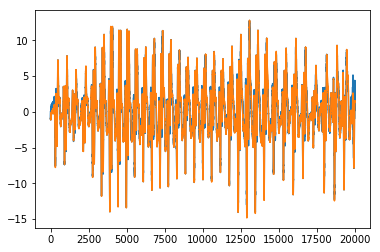

In [323]:
# integrate pp2 twice to see what we get
ppi = np.diff(np.diff(pp2)) * log_rate * log_rate
plt.plot(ppi) # surprisingly good!
print(np.max(ppi), np.min(ppi))
print(np.max(ff), np.min(ff))
plt.plot(ff)

In [ ]:
# Can we model it as a sine wave and estimate the amplitude?
accAmp = 13.8
freq = 350


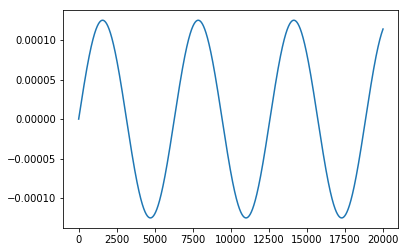

In [275]:
act = np.sin(200*xx) / 8000
plt.plot(act) ## actual value of true signal of interest -- not too bad!

In [60]:
kr = KernelRidge(kernel = "polynomial", alpha = 0.00000001, degree = 6)
kr.fit(x_sub, vv[subsamp])
preds = kr.predict(xx.reshape(-1,1))
plt.plot(preds)
plt.plot(vv)


array([ 0.        ,  0.00100005,  0.0020001 ,  0.00300015,  0.0040002 ,
        0.00500025,  0.0060003 ,  0.00700035,  0.0080004 ,  0.00900045,
        0.0100005 ,  0.01100055,  0.0120006 ,  0.01300065,  0.0140007 ,
        0.01500075,  0.0160008 ,  0.01700085,  0.0180009 ,  0.01900095,
        0.020001  ,  0.02100105,  0.0220011 ,  0.02300115,  0.0240012 ,
        0.02500125,  0.0260013 ,  0.02700135,  0.0280014 ,  0.02900145,
        0.0300015 ,  0.03100155,  0.0320016 ,  0.03300165,  0.0340017 ,
        0.03500175,  0.0360018 ,  0.03700185,  0.0380019 ,  0.03900195,
        0.040002  ,  0.04100205,  0.0420021 ,  0.04300215,  0.0440022 ,
        0.04500225,  0.0460023 ,  0.04700235,  0.0480024 ,  0.04900245,
        0.0500025 ,  0.05100255,  0.0520026 ,  0.05305265,  0.0540527 ,
        0.05505275,  0.0560528 ,  0.05705285,  0.0580529 ,  0.05905295,
        0.060053  ,  0.06105305,  0.0620531 ,  0.06305315,  0.0640532 ,
        0.06505325,  0.0660533 ,  0.06705335,  0.0680534 ,  0.06

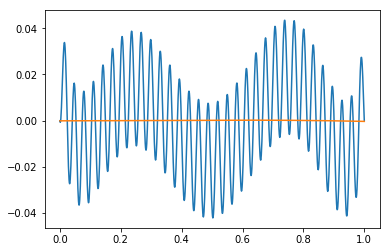

In [68]:
kr = KernelRidge(kernel = "polynomial", alpha = 10)
kr.fit(xx[np.linspace(0, len(xx)-1, 1000).astype(int)].reshape(-1,1), vv[np.linspace(0, len(xx)-1, 1000).astype(int)])
preds = kr.predict(xx[np.linspace(0, len(xx)-1, 1000).astype(int)].reshape(-1,1))
plt.plot(xx[np.linspace(0, len(xx)-1, 1000).astype(int)].reshape(-1,1), vv[np.linspace(0, len(xx)-1, 1000).astype(int)])
plt.plot(xx[np.linspace(0, len(xx)-1, 1000).astype(int)].reshape(-1,1), preds)

In [ ]:
vv = (np.cumsum(ff- np.mean(ff)) ) / log_rate

In [ ]:
vv = (np.cumsum(ff- np.mean(ff)) ) / log_rate
plt.plot(vv)
plt.show()

kr.fit(xx.reshape(-1,1), vv)
pp2 = kr.predict(xx.reshape(-1,1))

In [ ]:
pp = (np.cumsum(vv- np.mean(vv)) ) / log_rate
plt.plot(pp)

# answer
#intg = 2*xx - 1/20 * np.cos(100* xx)
#plt.plot(intg)

In [ ]:
# print system info
import IPython
print(IPython.sys_info())

In [ ]:
# convert to html, so ppl don't have to run python to see code
!jupyter nbconvert --to html 008_ExampleFigureSpectrum